# Import Libraries

In [46]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Import Dataset

In [47]:
flights = pd.read_csv('/Users/salsabilafcr/Documents/DATA ANALYTICS/Projects/Python Project/Data/flights.csv')
flights.shape

/var/folders/d4/c20nklvn78bgl16hsndrlw_80000gn/T/ipykernel_1243/1142473628.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('/Users/salsabilafcr/Documents/DATA ANALYTICS/Projects/Python Project/Data/flights.csv')


(5819079, 31)

In [48]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning 

## Remove Unecessary Columns

In [49]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

FLIGHT_NUMBER, TAIL_NUMBER, TAXI_OUT, WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, WHEELS_ON, TAXI_IN, DIVERTED = We do not need these columns as they do not provide any relevant information to the model.

In [50]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 
                   'DESTINATION_AIRPORT','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 
                   'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON',
                   'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [51]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Handle Missing Value

In [52]:
# take a look if any missing value
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Some columns in the dataset contain a large number of null values. For example, the CANCELLATION_REASON column has 5,729,195 empty rows, indicating that the number of flights that were not canceled. Whereas, the AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY columns have 4,755,640 null rows, indicating that the number of flights did not experience delays caused by air system, security, airline, late aircraft, or weather. But we need to ensure the reason why they are null.

Then, we examine why the "delay reason" column has more null values, 4,755,640, than the "arrival delay" column which only has 105,071 null values.

In [53]:
flights[flights['ARRIVAL_DELAY'].isna()].shape

(105071, 20)

Jika kita filter nilai null pada kolom 'ARRIVAL_DELAY', maka bisa lihat bahwa kolom delay reason juga ikut null

In [54]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values.shape

(4755640, 20)

Hal ini mengindikasikan bahwa jika salah satu kolom delay reason nya null maka kolom delay reason yang lain juga akan null.

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

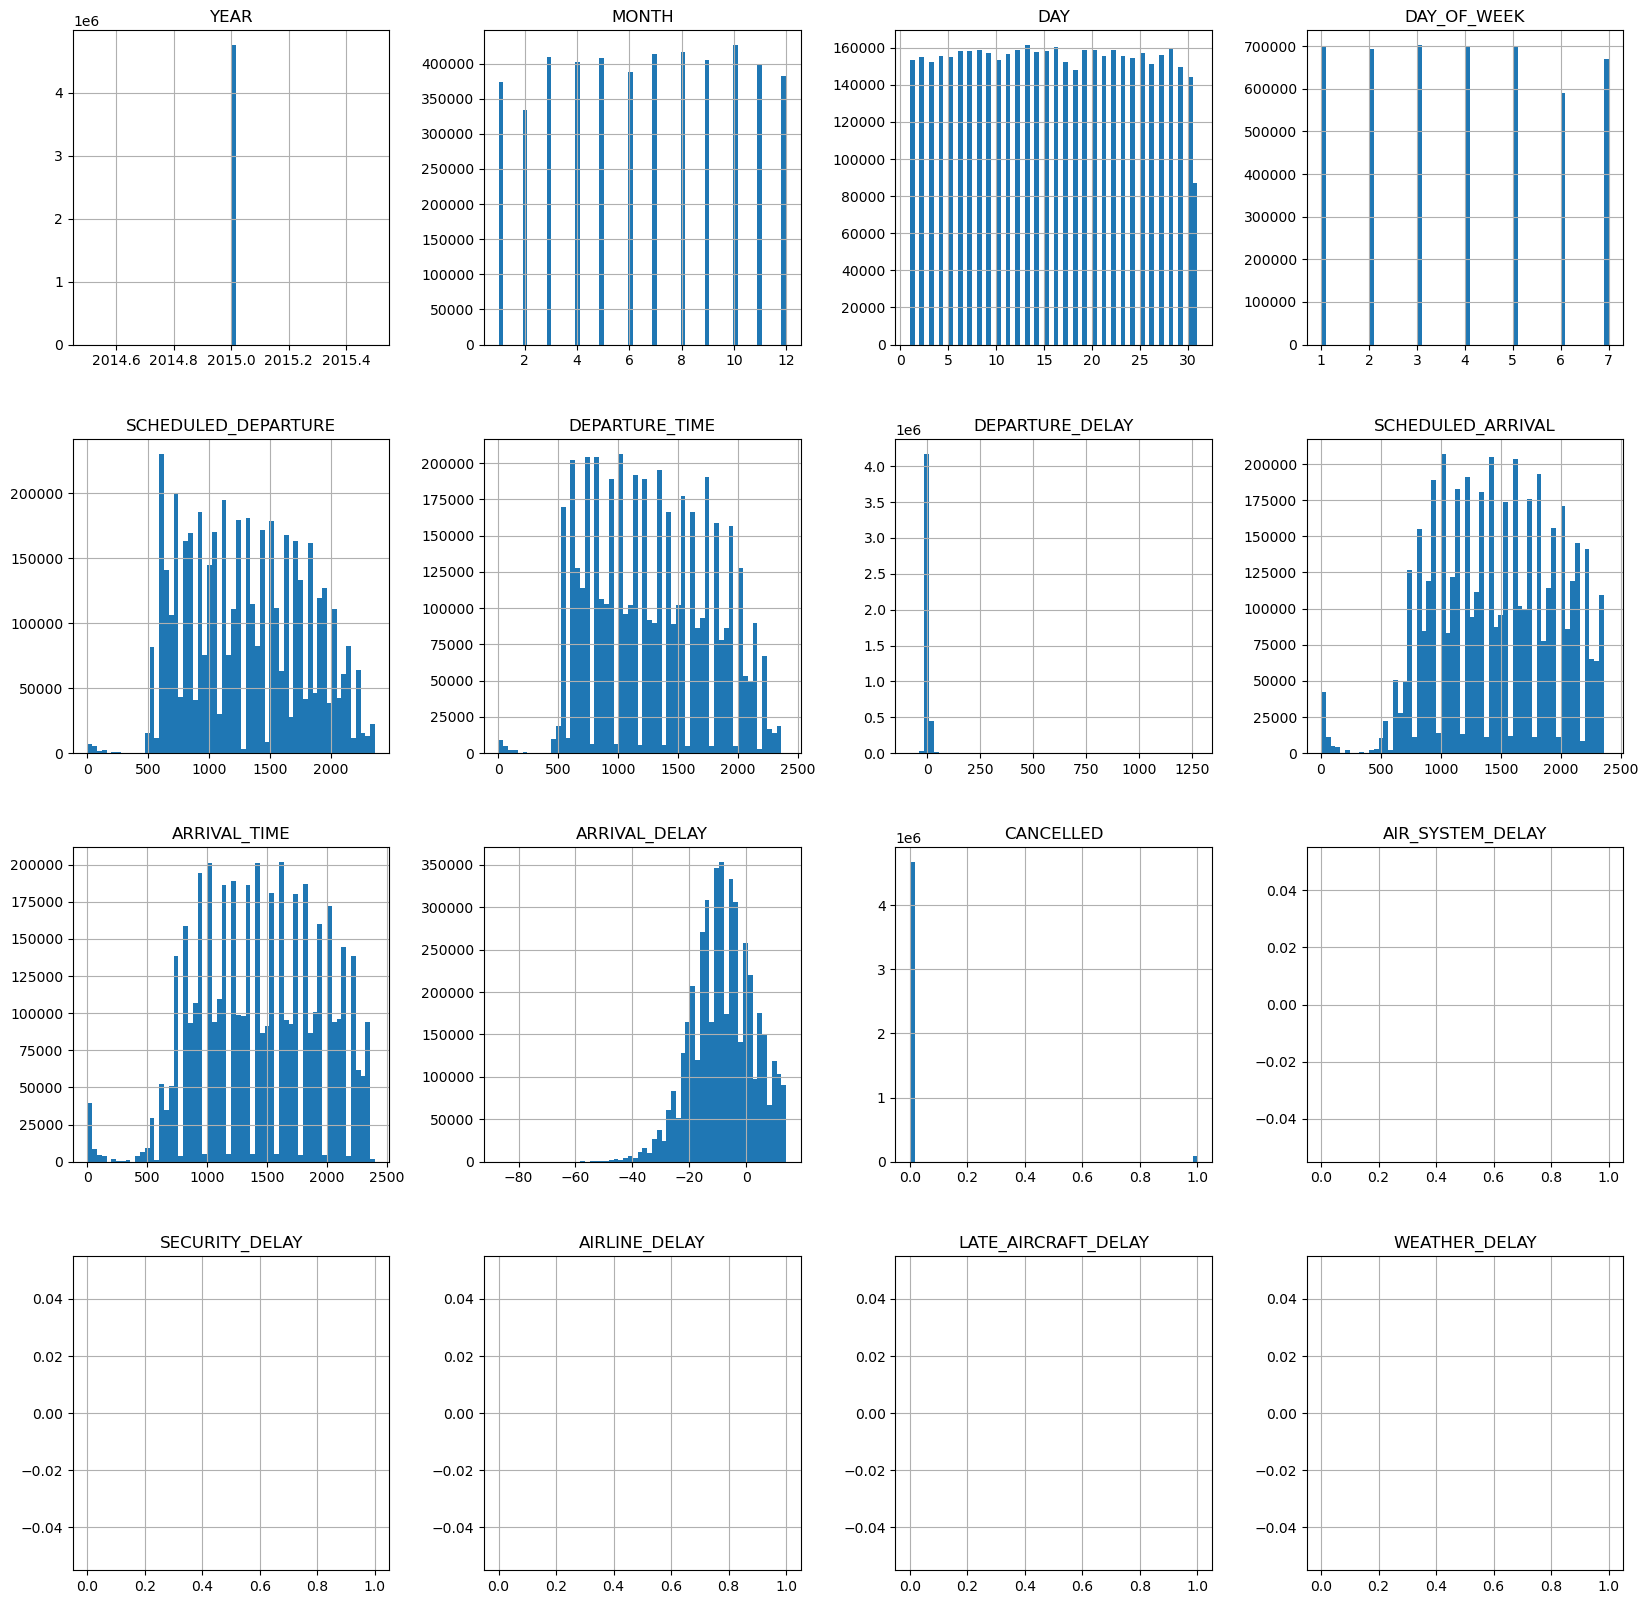

In [55]:
na_values.hist(bins=60, figsize=(20,20))

In [56]:
na_values[na_values['ARRIVAL_DELAY']>15]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


This histogram is intended to see the null value when all delay reason columns are empty. Then we can conclude that if the arrival delay is less than 15 minutes, it is not counted as a delay. Therefore, the value of the delay reason column is empty.

So, the delay is counted as 15 minutes from the scheduled arrival.

In [57]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5191952,2015,11,21,6,WN,PHX,MDW,645,NaN,NaN,1105,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
4214538,2015,9,20,7,DL,SLC,ORD,845,842.0,-3.0,1257,1512.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5750283,2015,12,27,7,AA,DTW,DFW,1513,NaN,NaN,1724,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
2751600,2015,6,22,1,MQ,ORD,CMH,1834,NaN,NaN,2104,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
671938,2015,2,14,6,WN,SMF,BUR,930,NaN,NaN,1040,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN


In [58]:
arrival_na['CANCELLED'].value_counts()

CANCELLED
1    89884
0    15187
Name: count, dtype: int64

But, why is 'ARRIVAL DELAY' missing? If we compare the value in the 'ARRIVAL_TIME' column (time = 16:47) with the 'SCHEDULED_ARRIVAL' column (time = 14:05), there should be an arrival delay of about 2 hours, but the 'ARRIVAL_DELAY' column has no value. Therefore, we need to remove the null value in the 'ARRIVAL_DELAY' column, as we cannot generate accurate information when creating the prediction model.

In [59]:
# remove null value 
flights = flights[~flights['ARRIVAL_DELAY'].isna()]

In [60]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [61]:
# fill delay reason columns with 0
flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
         'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                                                             'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(0)
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,0,NaN,0.0,0.0,0.0,0.0,0.0


## Outliers

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

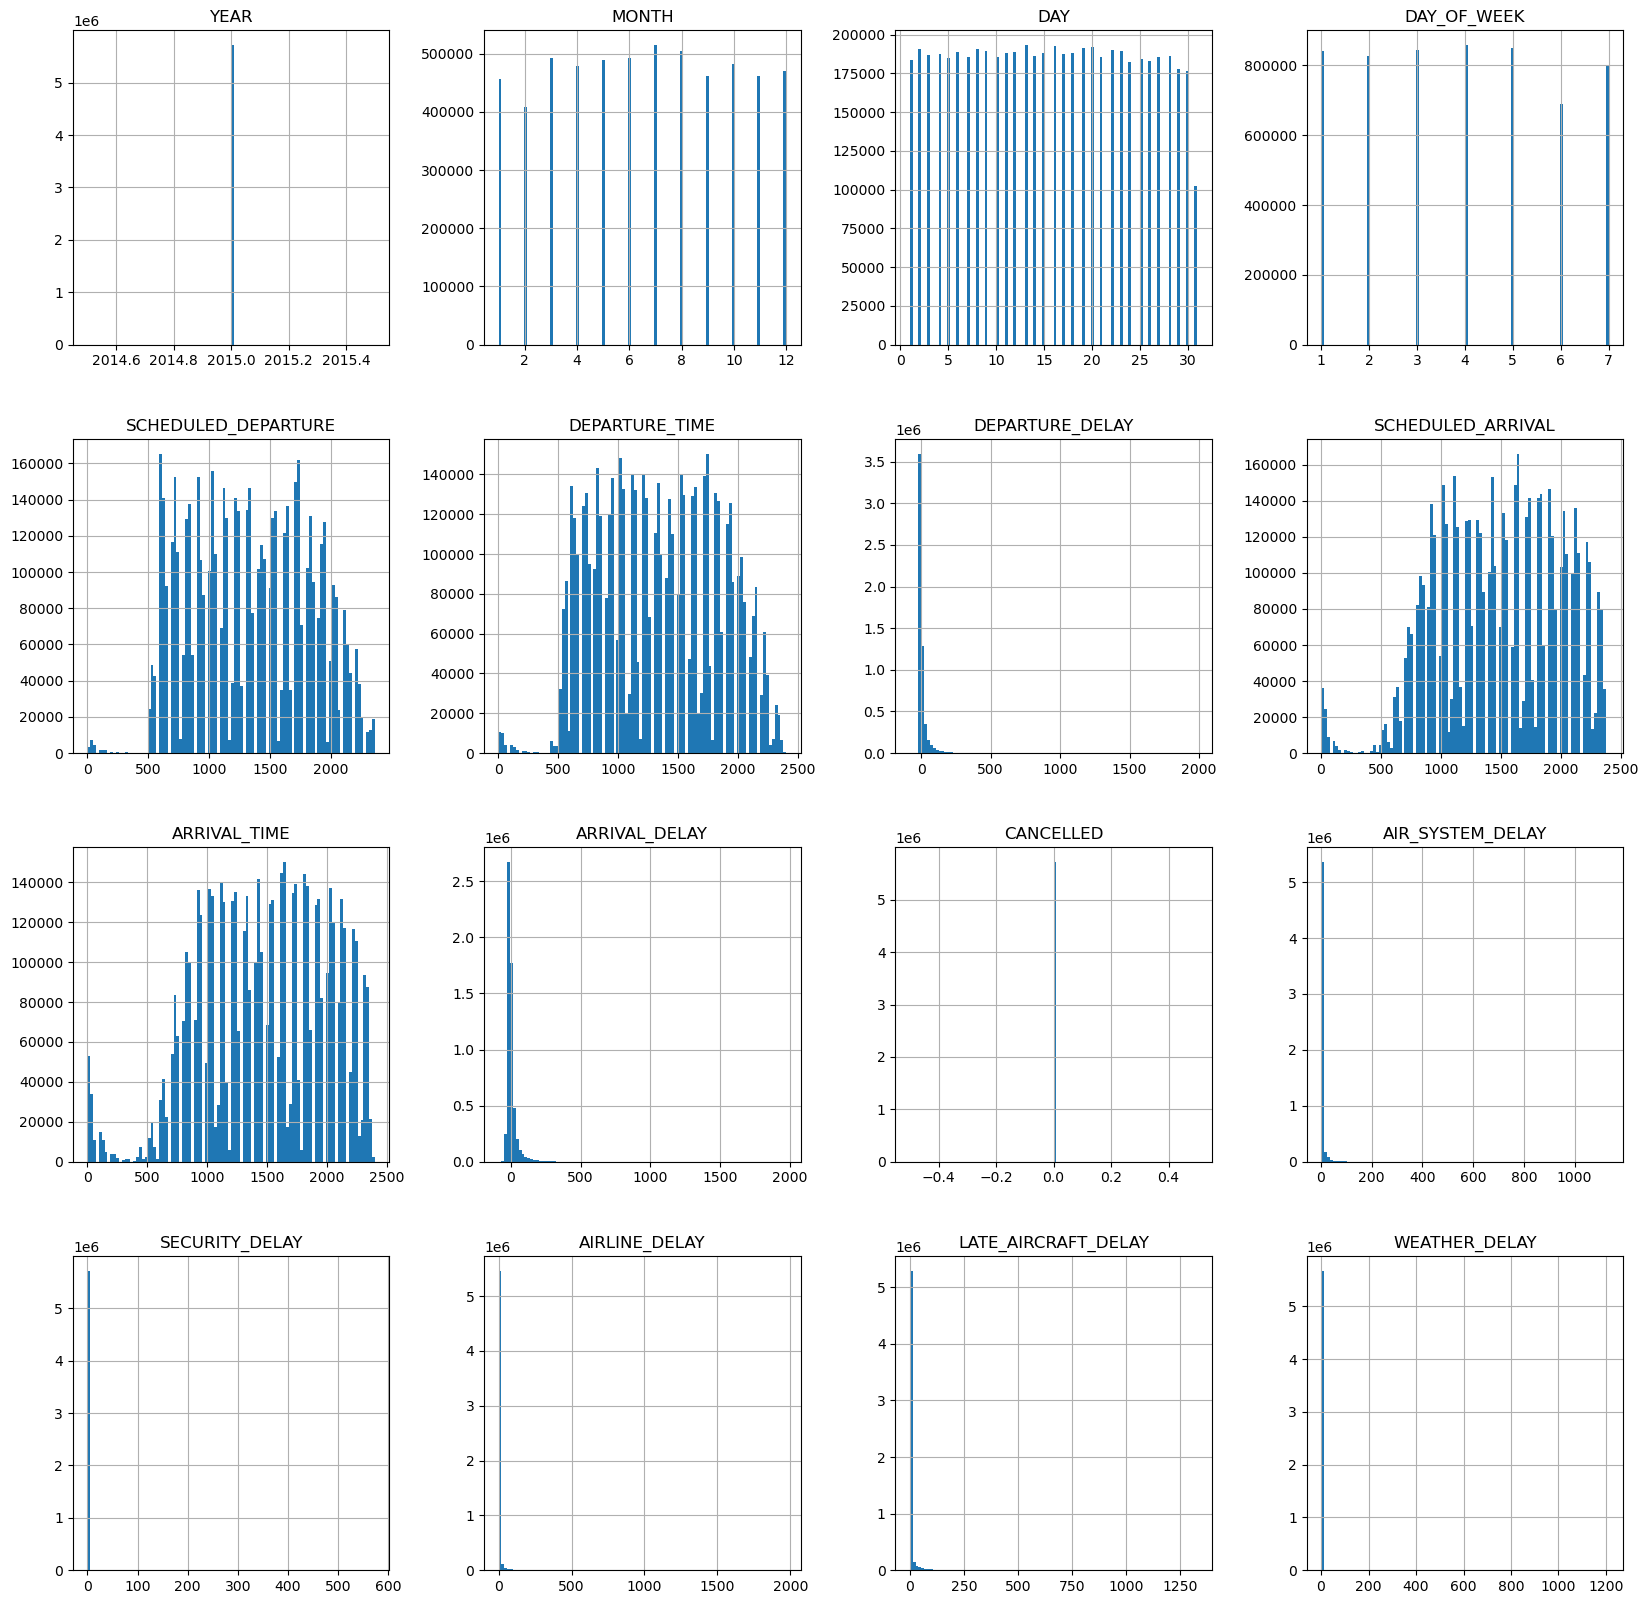

In [62]:
# using histogram to check the outliers
flights.hist(bins=100, figsize=(20,20))

# Model Training Preparation

## Features Target Preparation

In [63]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [64]:
# remove unnecessary columns
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

We will only keep columns with obvious reasons for delay, as we will later use the variables as targets in modeling.

In [65]:
flights['AIRLINE'].value_counts()

AIRLINE
WN    1242403
DL     870275
AA     712935
OO     576814
EV     554752
UA     507762
MQ     278791
B6     262042
US     194223
AS     171439
NK     115193
F9      90090
HA      76041
VX      61248
Name: count, dtype: int64

In [66]:
flights['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
ATL      343506
ORD      276554
DFW      232647
DEN      193402
LAX      192003
          ...  
14222         1
14025         1
13502         1
15497         1
12265         1
Name: count, Length: 929, dtype: int64

In [67]:
flights['DESTINATION_AIRPORT'].value_counts()

DESTINATION_AIRPORT
ATL      343076
ORD      275864
DFW      231764
DEN      193033
LAX      192136
          ...  
11097         1
14025         1
15497         1
12265         1
10666         1
Name: count, Length: 929, dtype: int64

We need to remove the 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' columns because they have a huge variation in values, making it difficult to use them for prediction modeling.

In [68]:
# remove unnecessary columns
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 
                   'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [69]:
# make the delay reason column into the same column 
flights['ALL_DELAY'] = flights [['AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 
                                 'WEATHER_DELAY']].sum(axis=1) # making row level
flights.sample(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ALL_DELAY
4772841,2015,10,25,7,WN,1430,1705,0.0,0.0,0.0,0.0,0.0,0.0
2811507,2015,6,26,5,MQ,922,1115,36.0,0.0,0.0,0.0,0.0,36.0
3782374,2015,8,23,7,DL,1300,1450,0.0,0.0,25.0,0.0,0.0,25.0
3524421,2015,8,7,5,UA,1733,2054,0.0,0.0,0.0,0.0,0.0,0.0
898566,2015,2,28,6,OO,2040,2132,0.0,0.0,0.0,0.0,0.0,0.0
1039228,2015,3,9,1,WN,1730,2045,0.0,0.0,0.0,245.0,0.0,245.0
2174818,2015,5,18,1,AA,1815,1916,8.0,0.0,222.0,0.0,0.0,230.0
1576713,2015,4,11,6,WN,1635,1745,0.0,0.0,0.0,0.0,0.0,0.0
4311295,2015,9,26,6,WN,835,1245,0.0,0.0,11.0,28.0,0.0,39.0
4346005,2015,9,28,1,WN,1400,1725,8.0,0.0,44.0,0.0,0.0,52.0


In [70]:
flights['DELAY_REASON']=np.where(flights['ALL_DELAY']>0, 
                                 flights[['AIR_SYSTEM_DELAY',
                                          'SECURITY_DELAY', 'AIRLINE_DELAY', 
                                          'LATE_AIRCRAFT_DELAY', 
                                          'WEATHER_DELAY']].idxmax(axis=1), 'NO DELAY')

In [71]:
flights.sample(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ALL_DELAY,DELAY_REASON
1211144,2015,3,20,5,WN,805,1020,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
1127721,2015,3,15,7,US,825,1642,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
3125540,2015,7,15,3,EV,918,1100,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
704205,2015,2,16,1,DL,1400,1551,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
3262265,2015,7,23,4,EV,1014,1131,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
4497856,2015,10,8,4,AA,645,1023,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
5148967,2015,11,18,3,EV,1305,1352,5.0,0.0,0.0,16.0,0.0,21.0,LATE_AIRCRAFT_DELAY
4764757,2015,10,25,7,AA,600,646,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
1167897,2015,3,17,2,UA,1500,1638,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY
3455209,2015,8,3,1,AS,1750,1850,0.0,0.0,0.0,0.0,0.0,0.0,NO DELAY


In [72]:
# make sure it's distibuted evenly
flights['DELAY_REASON'].value_counts()

DELAY_REASON
NO DELAY               4650569
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
AIR_SYSTEM_DELAY        303784
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: count, dtype: int64

## Final Preparation for Model Training

In [73]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ALL_DELAY',
       'DELAY_REASON'],
      dtype='object')

In [74]:
# remove unnecessary columns
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 
                   'SCHEDULED_DEPARTURE','DELAY_REASON']]

In [75]:
X_flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 
                   'SCHEDULED_DEPARTURE']]
X_flights = pd.get_dummies(X_flights)

y_flights = flights[['DELAY_REASON']]

In [76]:
X_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,5,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2015,1,1,4,10,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2015,1,1,4,20,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2015,1,1,4,20,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2015,1,1,4,25,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2359,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819075,2015,12,31,4,2359,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819076,2015,12,31,4,2359,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819077,2015,12,31,4,2359,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [77]:
X_flights[['AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV',
       'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO',
       'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN']] = X_flights[['AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV',
       'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO',
       'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN']].astype(int)

In [78]:
X_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,4,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015,1,1,4,20,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2015,1,1,4,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015,1,1,4,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2359,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5819075,2015,12,31,4,2359,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5819076,2015,12,31,4,2359,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5819077,2015,12,31,4,2359,0,0,1,0,0,0,0,0,0,0,0,0,0,0


This processed data can be used in various machine learning models to predict the reasons for flight delays.